## 載入相關套件

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 定義超參數
batch_size = 64
learning_rate = 0.001
num_epochs = 10

## 下載並準備 MNIST 數據集

In [32]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


## 定義 CNN 架構

In [33]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(in_features=32*7*7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = CNN()
model

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

## 損失函數和優化器

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## 訓練模型

In [35]:
# 訓練和評估，同時繪製Loss和Accuracy變化趨勢
loss_history = []
accuracy_history = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    loss_history.append(total_loss / len(train_loader))
    accuracy_history.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {loss_history[-1]:.4f}, Accuracy: {accuracy:.4f}')


Epoch [1/10] - Loss: 0.1917, Accuracy: 0.9432
Epoch [2/10] - Loss: 0.0536, Accuracy: 0.9840
Epoch [3/10] - Loss: 0.0380, Accuracy: 0.9884
Epoch [4/10] - Loss: 0.0283, Accuracy: 0.9911
Epoch [5/10] - Loss: 0.0219, Accuracy: 0.9930
Epoch [6/10] - Loss: 0.0182, Accuracy: 0.9942
Epoch [7/10] - Loss: 0.0136, Accuracy: 0.9955
Epoch [8/10] - Loss: 0.0118, Accuracy: 0.9961
Epoch [9/10] - Loss: 0.0096, Accuracy: 0.9969
Epoch [10/10] - Loss: 0.0073, Accuracy: 0.9975


## 繪製 loss 與 Accuracy 變化圖

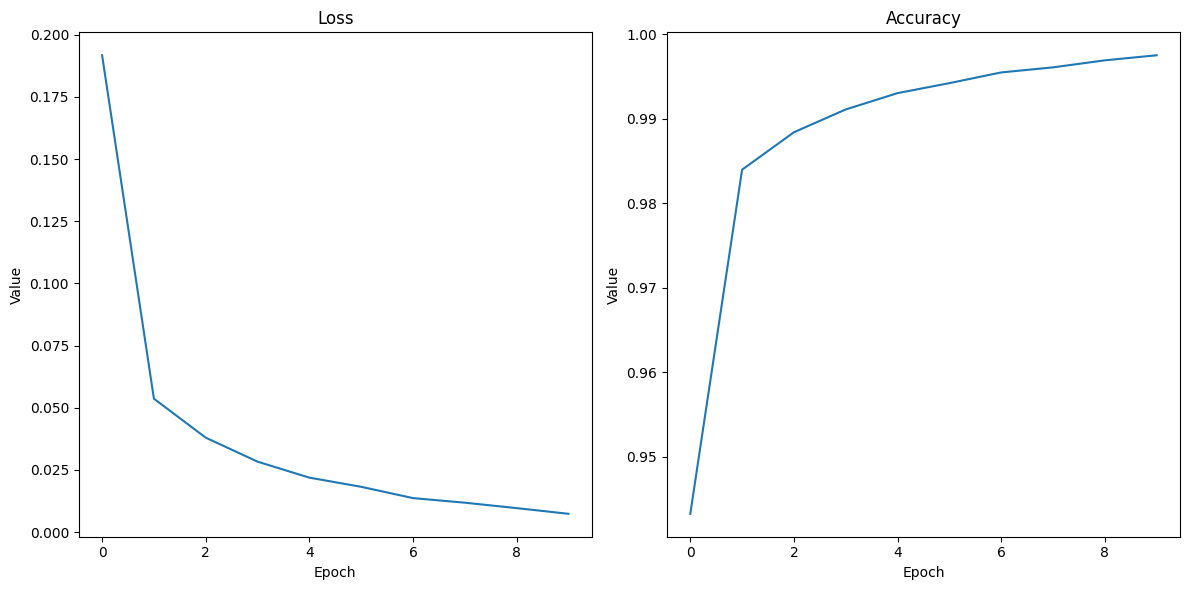

In [36]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

## 評估測試資料集

In [37]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'測試準確率：{100 * correct / total:.2f}%')


測試準確率：98.79%


## 保存訓練好的模型

In [38]:
# 保存訓練好的模型
torch.save(model.state_dict(), 'mnist_cnn_model.pth')